In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Customer Churn Prediction

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Preprocessing

**Finding if any NAN values are present**

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Printing unique values in columns having object datatypes**

In [4]:
## Method 1
# for col in df.select_dtypes(include=['object']).columns:
#     print(f"Unique values in column '{col}':")
#     print(df[col].unique())
#     print("\n")

## Method 2
def print_unique_vals():    
    for col in df.columns:
        if(df[col].dtypes == 'object'):
            print(f'{col} : {df[col].unique()}')
            print()
print_unique_vals()

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn : ['No' 'Yes']



**Deleting Customer ID as it is not necessary.**

In [5]:
if('customerID' in df.columns):
    df.drop('customerID', axis='columns', inplace=True)

for col in df.columns:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [6]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [7]:
print_unique_vals()

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes']

OnlineBackup : ['Yes' 'No']

DeviceProtection : ['No' 'Yes']

TechSupport : ['No' 'Yes']

StreamingTV : ['No' 'Yes']

StreamingMovies : ['No' 'Yes']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn : ['No' 'Yes']



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.loc[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce') #if ' ' convert it tot Nan
df['TotalCharges'].dtype

dtype('float64')

In [11]:
# df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = df['MonthlyCharges']
# df.loc[df['TotalCharges'] == ' ']
df['TotalCharges'].isnull().sum()

11

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'].mean())
df['TotalCharges'].isnull().sum()

0

In [13]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [14]:
print_unique_vals()

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes']

OnlineBackup : ['Yes' 'No']

DeviceProtection : ['No' 'Yes']

TechSupport : ['No' 'Yes']

StreamingTV : ['No' 'Yes']

StreamingMovies : ['No' 'Yes']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']



We apply our machine learning algorithms on :
* df1 - dataframe on which we applied One-hot-encoding
* df - dataframe on which we applied Label-encoding

**df1 performed better**

In [15]:
#using One-hot-encoding -> this makes much more sense, since the values are not ordinal (i.e. doesn't have any intrinsic order)
df1 = df
df1 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [16]:
df1.dtypes

gender                                    object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [17]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

def object_to_int(x : [pd.Series]):
    if(x.dtype == 'object'):
        x = LabelEncoder().fit_transform(x)
    return x

In [18]:
df1 = df1.apply(lambda x: object_to_int(x))
df1.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [19]:
df1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3019,0,0,1,1,22,1,0,0,1,0,...,55.15,1206.05,1,False,False,False,False,False,True,False
5816,0,0,0,0,3,1,0,0,0,0,...,44.60,122.70,0,False,False,False,False,False,True,False
3480,1,0,1,0,70,1,0,0,0,0,...,19.85,1433.80,0,False,True,False,True,True,False,False
4728,1,0,0,0,46,0,0,1,0,1,...,38.25,1755.35,0,False,False,False,True,False,False,True
1980,1,0,0,0,10,1,1,0,1,1,...,95.25,1021.55,0,True,False,False,False,False,True,False
5373,1,0,1,0,71,1,0,0,1,1,...,105.25,7291.75,0,True,False,False,True,False,True,False
6593,1,0,1,0,55,0,0,0,0,1,...,54.55,2978.30,1,False,False,False,False,False,False,False
933,0,1,0,0,4,1,1,0,0,0,...,84.60,360.10,1,True,False,False,False,False,True,False
3165,1,0,1,1,24,1,0,0,0,0,...,20.25,439.75,0,False,True,True,False,False,False,True
4458,1,0,1,1,38,1,1,0,1,1,...,94.65,3624.30,1,True,False,False,False,False,True,False


In [20]:
#usinglabel encoder on columns having multiple values
df = df.apply(lambda x: object_to_int(x))
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3785,1,1,1,0,10,1,1,1,0,0,1,0,0,1,0,1,2,89.80,914.30,1
3572,0,1,0,0,32,1,0,1,0,0,0,0,0,1,0,1,2,79.50,2665.00,0
6562,0,1,1,0,14,1,1,1,0,1,0,0,1,1,0,1,2,100.20,1369.80,1
733,0,0,1,1,72,1,1,1,1,0,0,0,0,0,2,0,0,79.05,5730.70,0
1111,0,0,0,0,4,1,0,1,1,0,1,1,0,1,0,1,0,94.40,387.20,1
3307,0,0,1,1,48,1,1,0,0,1,0,1,1,1,2,0,2,79.65,3870.30,0
5591,1,0,0,0,4,1,0,1,0,0,0,0,1,1,0,1,2,88.45,370.65,1
6370,0,0,0,0,45,1,1,1,0,1,0,0,1,0,0,1,1,89.30,4016.85,1
5499,1,1,0,0,15,1,0,1,0,0,0,0,0,1,0,1,2,79.40,1156.10,1
2977,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,1,3,19.50,19.50,0


In [21]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Visualizing the outlier trends in Tenure, Monthly Charges and Total Charges

Text(0.5, 1.0, 'Tenure vs Customer Churned')

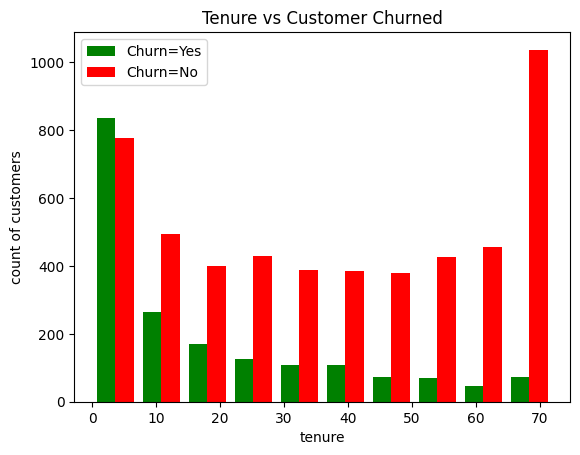

In [22]:
tenure_churn_no = df[df['Churn'] == 0].tenure #leaving customers
tenure_churn_yes = df[df['Churn'] == 1].tenure #staying customers
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('count of customers')
plt.title('Tenure vs Customer Churned')

Text(0.5, 1.0, 'MonthlyCharges vs Customer Churned')

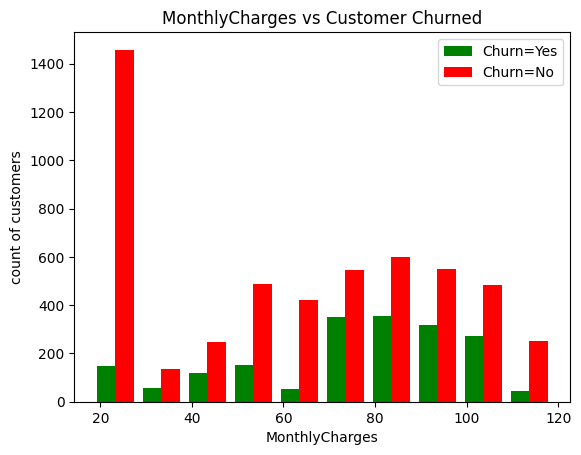

In [23]:
#monthly charges vs customer churned
monthlyCharges_churn_no = df[df['Churn'] == 0].MonthlyCharges #leaving customers
monthlyCharges_churn_yes = df[df['Churn'] == 1].MonthlyCharges #staying customers
plt.hist([monthlyCharges_churn_yes, monthlyCharges_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('count of customers')
plt.title('MonthlyCharges vs Customer Churned')

Text(0.5, 1.0, 'TotalCharges vs Customer Churned')

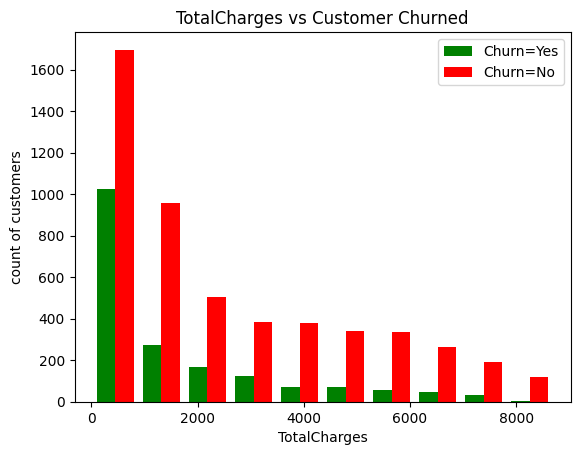

In [24]:
#total charges vs customer churned
totalCharges_churn_no = df[df['Churn'] == 0].TotalCharges #leaving customers
totalCharges_churn_yes = df[df['Churn'] == 1].TotalCharges #staying customers
plt.hist([totalCharges_churn_yes, totalCharges_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('TotalCharges')
plt.ylabel('count of customers')
plt.title('TotalCharges vs Customer Churned')

## Removing Outliers by Scaling the data

In [25]:
#scaling the data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

columns_to_scale = ['tenure', 'TotalCharges', 'MonthlyCharges']
scaling = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), columns_to_scale)
])

In [26]:
X1  = df1.iloc[:, :-1] #df1 = dataframe on which one-hot-encoding was applied
y1 = df1.iloc[:, -1]

In [27]:
X = df.iloc[:, :-1] #df = dataframe on which only label encoding was applied
y = df.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.33, random_state= 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(4718, 19) (2325, 19) (4718,) (2325,)
(4718, 23) (2325, 23) (4718,) (2325,)


## Logistic Regression

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(MinMaxScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [30]:
print(f'Logistic Regression score without one-hot-encoding: {pipe.score(X_test, y_test)}')

Logistic Regression score without one-hot-encoding: 0.7974193548387096


In [31]:
pipe.fit(X1_train, y1_train)  # apply scaling on training data

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [32]:
print(f'Logistic Regression score with one-hot-encoding: {pipe.score(X1_test, y1_test)}')

Logistic Regression score with one-hot-encoding: 0.8795698924731182


## Random Forest Classifier

In [33]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier())
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [34]:
print(f'RandomForestClassifier score without one-hot-encoding: {pipe.score(X_test, y_test)}')

RandomForestClassifier score without one-hot-encoding: 0.7905376344086021


In [35]:
pipe.fit(X1_train, y1_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [36]:
print(f'RandomForestClassifier score with one-hot-encoding: {pipe.score(X1_test, y1_test)}')

RandomForestClassifier score with one-hot-encoding: 0.8688172043010752


In [37]:
len(X1_train.columns)

23

## Artificial Neural Network

In [38]:
#ANN, working with one-hot encoded data i.e. df1
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(23,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

2024-08-23 18:18:45.775239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 18:18:45.775355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 18:18:45.925526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921 (3.60 KB)

 Trainable params: 921 (3.60 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='accuracy')
]

In [42]:
results = model.fit(X1_train, y1_train, epochs=10)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5680 - loss: 48.6535
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.6398
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7560 - loss: 0.6242
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7542 - loss: 0.6088
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7668 - loss: 0.7306
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 0.5977
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.7366
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.5101
Epoch 9/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.4345
Epoch 10/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.4703


In [43]:
model.evaluate(X1_test, y1_test)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.3751


[0.40443411469459534, 0.8511828184127808]

In [44]:
y_pred = model.predict(X1_test)
predicted_labels = []
for ele in y_pred:
    if ele > 0.5:
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)
print(y_pred[:4])
print(predicted_labels[:4])
print(y1_test[:4])

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[2.8267199e-01]
 [1.9675026e-04]
 [1.4229283e-01]
 [7.1880430e-01]]
[0, 0, 0, 1]
2200    False
4627    False
3225    False
2828     True
Name: PaymentMethod_Mailed check, dtype: bool


In [45]:
y1_test = np.array(y1_test.astype(int))
y1_test[:4]

array([0, 0, 0, 1])

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y1_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1796
           1       0.79      0.47      0.59       529

    accuracy                           0.85      2325
   macro avg       0.83      0.72      0.75      2325
weighted avg       0.84      0.85      0.84      2325



Text(95.72222222222221, 0.5, 'Truth')

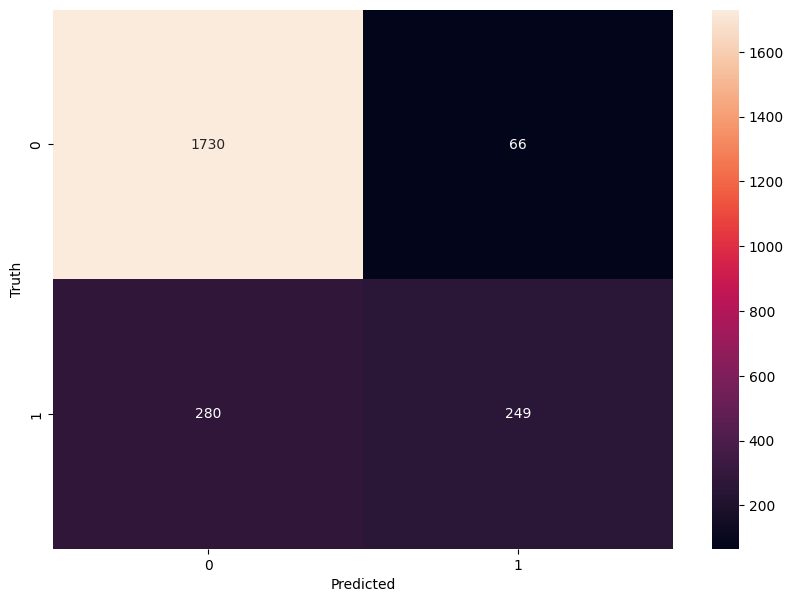

In [47]:
import seaborn as sn
cm = confusion_matrix(y1_test, predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')